In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Q1

In [2]:
q1=pd.read_csv("queries/q1_scopus.csv")

In [3]:
# copy of year col as str
q1["Year_str"]=q1["Year"].astype(str)

# before 2000 assign label <2000
q1.loc[q1["Year"]<2000,"Year_str"]="<2000"

In [4]:
# delete following document types
# should not be counted
q1.drop(q1[q1['Document Type'] == "Erratum"].index, inplace = True)

q1.drop(q1[q1['Document Type'] == "Retracted"].index, inplace = True)

In [5]:
q1["Document Type"].value_counts()

Document Type
Article             808
Conference paper    686
Book chapter         30
Review               20
Editorial             3
Book                  3
Name: count, dtype: int64

In [6]:
# put together book review and editorial
q1.loc[(q1["Document Type"]=="Book chapter") | (q1["Document Type"]=="Review") | (q1["Document Type"]=="Book") | (q1["Document Type"]=="Editorial"),
"Document Type"]="Books, Reviews, Editorials"

In [7]:
cross1=pd.crosstab(q1['Year_str'], q1['Document Type'])

# reindex <2000 goes before 2000
cross1=cross1.reindex(index=np.concatenate((cross1.index.values[-1:],cross1.index.values[0:-1])))

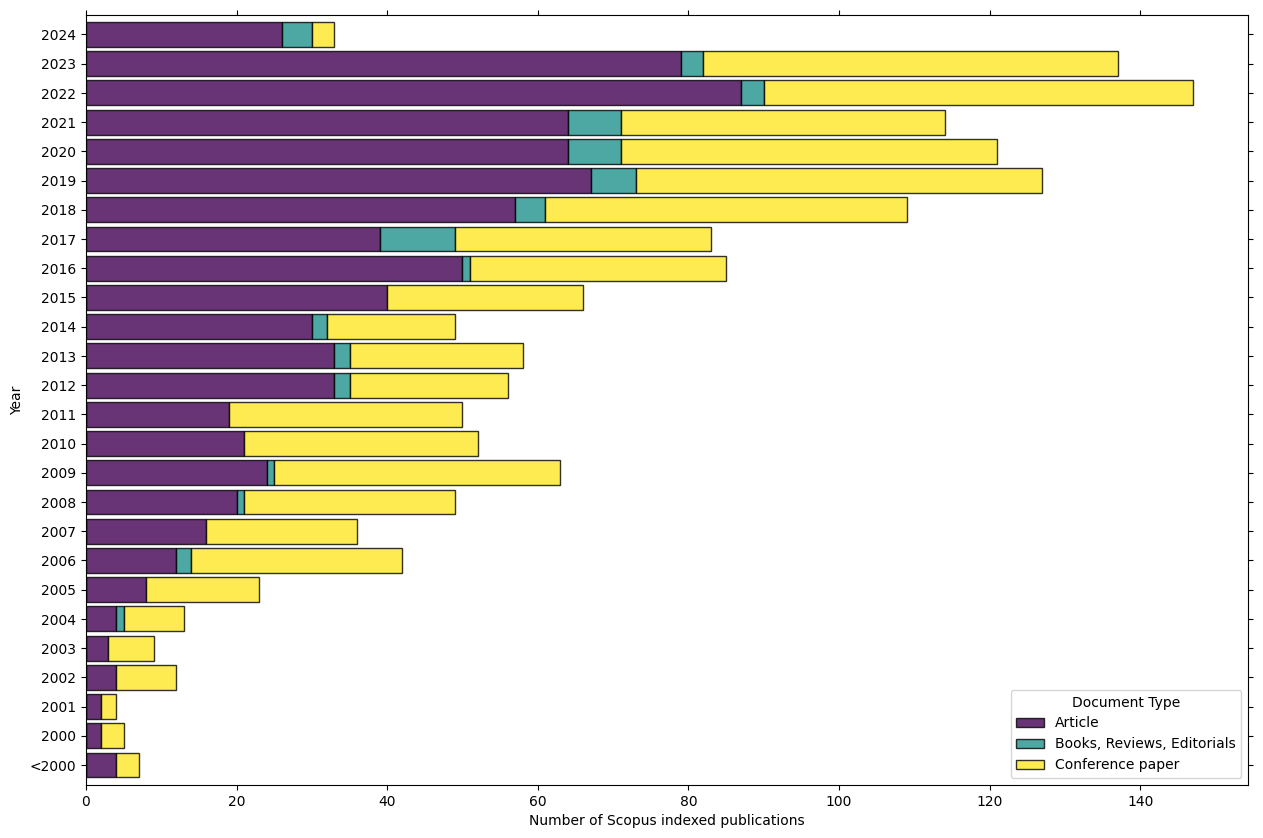

In [240]:
cross1.plot(kind="barh", stacked=True,figsize=(15,10), width=0.85, edgecolor="black", alpha=0.8, colormap="viridis")

# ticks
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,bottom=True, top=True, left=True, right=True)

# labels
plt.xlabel("Number of Scopus indexed publications")
plt.ylabel("Year")

plt.savefig("../thesis/images/epf_evolution1.jpg")

Q2

In [14]:
q2=pd.read_csv("queries/q2_scopus.csv")

In [17]:
# copy of year col as str
q2["Year_str"]=q2["Year"].astype(str)

q2.drop(q2[q2['Document Type'] == "Erratum"].index, inplace = True)

q2.drop(q2[q2['Document Type'] == "Retracted"].index, inplace = True)

q2["Document Type"].value_counts()

Document Type
Article             119
Conference paper     33
Review                5
Book chapter          1
Book                  1
Editorial             1
Name: count, dtype: int64

In [77]:
q2_grp=pd.DataFrame(q2.groupby("Year_str")["Document Type"].count())
q2_grp.reset_index(inplace=True)
q2_grp.rename(columns={"Document Type": "Probabilistic forecast"}, inplace=True)

q1_grp=pd.DataFrame(q1.groupby("Year_str")["Document Type"].count())
q1_grp.reset_index(inplace=True)
q1_grp.rename(columns={"Document Type": "Point forecast"}, inplace=True)

pnt_prob=pd.merge(q1_grp, q2_grp, on="Year_str", how="outer")


pnt_prob=pnt_prob.fillna(0)
pnt_prob=pnt_prob.set_index("Year_str")
pnt_prob=pnt_prob.reindex(index=np.concatenate((pnt_prob.index.values[-1:],pnt_prob.index.values[0:-1])))

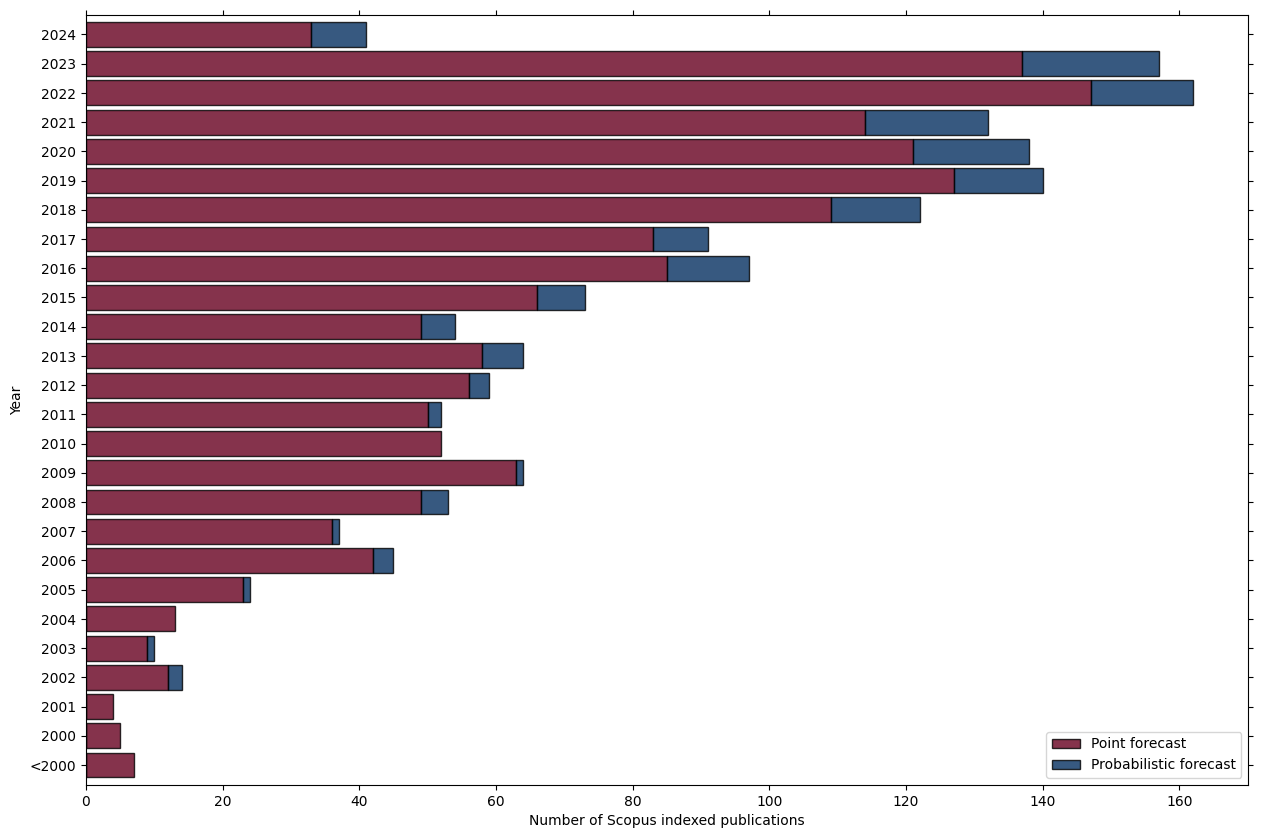

In [106]:
pnt_prob.plot(kind="barh", stacked=True,figsize=(15,10), width=0.85, edgecolor="black", alpha=0.8, colormap="RdBu")


# ticks
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,bottom=True, top=True, left=True, right=True)

# labels
plt.xlabel("Number of Scopus indexed publications")
plt.ylabel("Year")

plt.savefig("../thesis/images/point_vs_prob.jpg")

Q3,Q4,Q5
Q3=computational intelligence
Q4=statistical methods
Q5=both

In [130]:
q3=pd.read_csv("queries/q3_scopus.csv")
q4=pd.read_csv("queries/q4_scopus.csv")
q5=pd.read_csv("queries/q5_scopus.csv")

# copy of year col as str
q3["Year_str"]=q3["Year"].astype(str)
# before 2000 assign label <2000
q3.loc[q3["Year"]<2000,"Year_str"]="<2000"

q3.drop(q3[q3['Document Type'] == "Erratum"].index, inplace = True)
q3.drop(q3[q3['Document Type'] == "Retracted"].index, inplace = True)

q4["Year_str"]=q4["Year"].astype(str)
q4.loc[q4["Year"]<2000,"Year_str"]="<2000"
q4.drop(q4[q4['Document Type'] == "Erratum"].index, inplace = True)
q4.drop(q4[q4['Document Type'] == "Retracted"].index, inplace = True)

q5["Year_str"]=q5["Year"].astype(str)
q5.loc[q5["Year"]<2000,"Year_str"]="<2000"
q5.drop(q5[q5['Document Type'] == "Erratum"].index, inplace = True)
q5.drop(q5[q5['Document Type'] == "Retracted"].index, inplace = True)

q3_grp=pd.DataFrame(q3.groupby("Year_str")["Document Type"].count())
q3_grp.reset_index(inplace=True)
q3_grp.rename(columns={"Document Type": "Computational intelligence"}, inplace=True)

q4_grp=pd.DataFrame(q4.groupby("Year_str")["Document Type"].count())
q4_grp.reset_index(inplace=True)
q4_grp.rename(columns={"Document Type": "Statistical"}, inplace=True)

q5_grp=pd.DataFrame(q5.groupby("Year_str")["Document Type"].count())
q5_grp.reset_index(inplace=True)
q5_grp.rename(columns={"Document Type": "both"}, inplace=True)




cs_stat_both=pd.merge(pd.merge(q3_grp, q4_grp, on="Year_str", how="outer"),q5_grp, on="Year_str", how="outer")


cs_stat_both=cs_stat_both.fillna(0)
cs_stat_both=cs_stat_both.set_index("Year_str")
cs_stat_both=cs_stat_both.reindex(index=np.concatenate((cs_stat_both.index.values[-1:],cs_stat_both.index.values[0:-1])))

# take set difference
# so that Statistical is just stat
# same for Computational intelligence
cs_stat_both["Statistical"]=cs_stat_both["Statistical"]-cs_stat_both["both"]

cs_stat_both["Computational intelligence"]=cs_stat_both["Computational intelligence"]-cs_stat_both["both"]

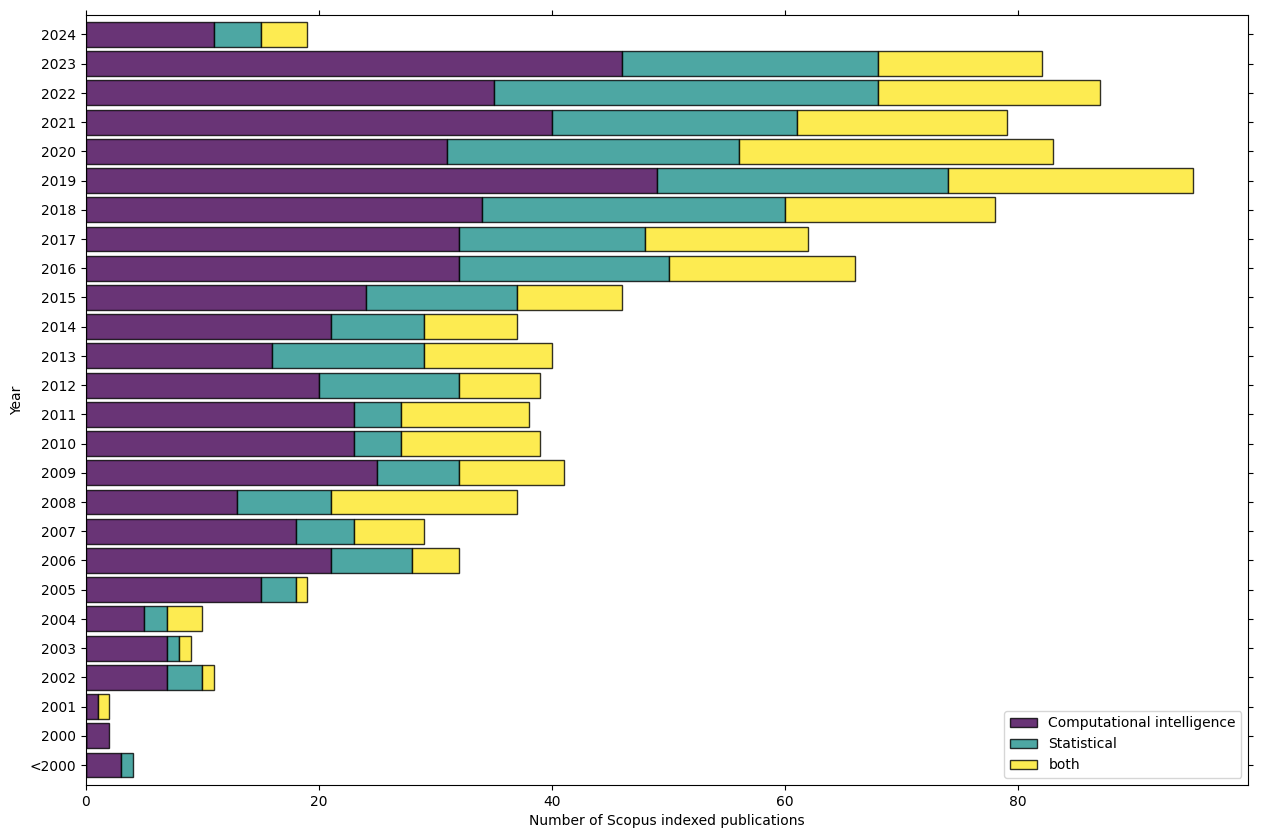

In [134]:
cs_stat_both.plot(kind="barh", stacked=True,figsize=(15,10), width=0.85, edgecolor="black", alpha=0.8, colormap="viridis")


# ticks
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,bottom=True, top=True, left=True, right=True)

# labels
plt.xlabel("Number of Scopus indexed publications")
plt.ylabel("Year")

plt.savefig("../thesis/images/cs_stat_both.jpg")

Q6

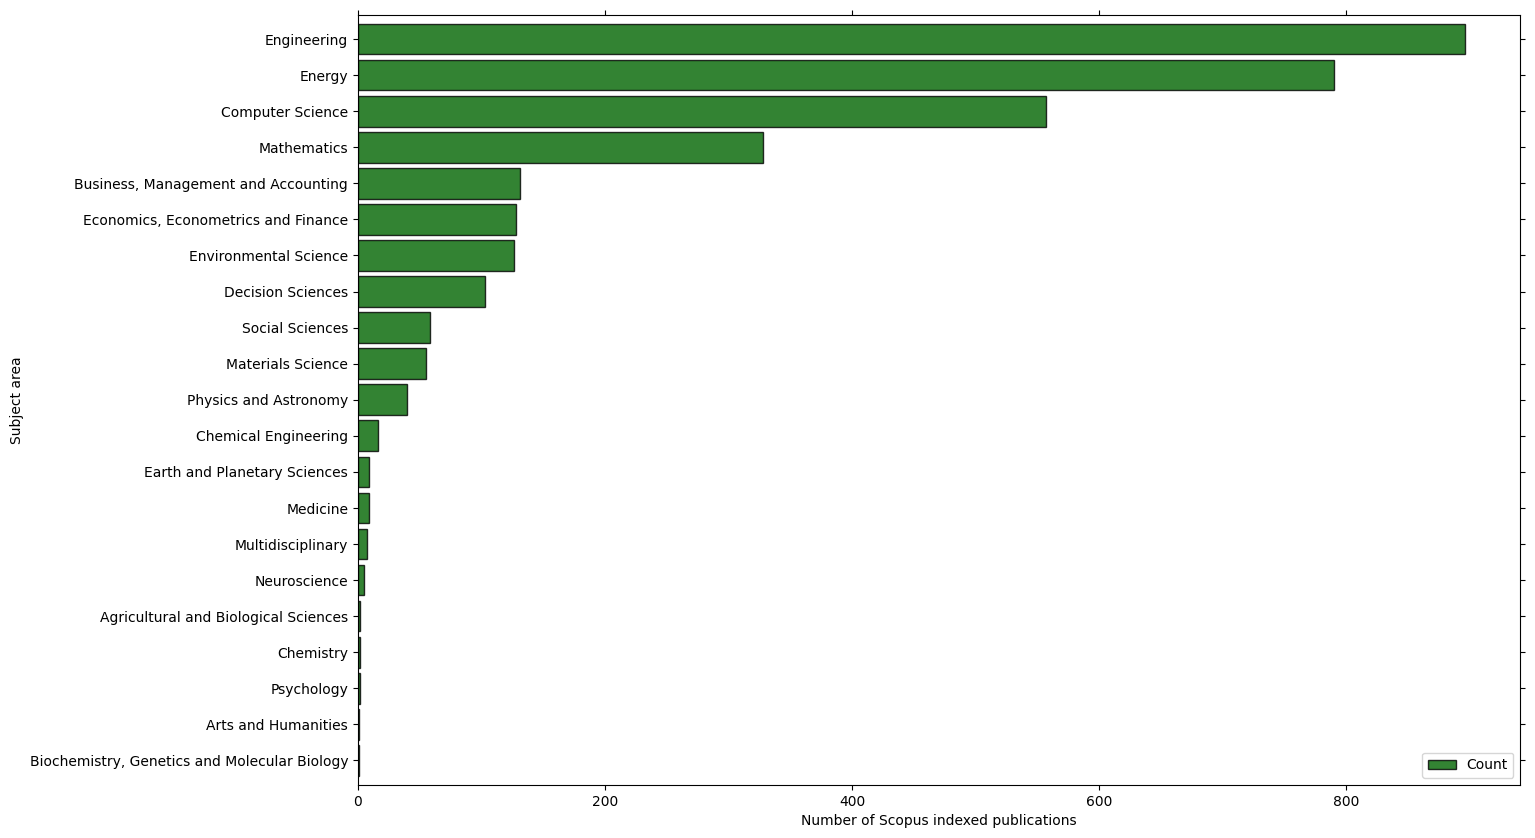

In [192]:
q6=pd.read_csv("queries/q6_scopus.csv")
q6=q6.set_index("SUBJECT AREA")

q6.iloc[::-1].plot( kind="barh", stacked=True,figsize=(15,10), width=0.85, edgecolor="black", alpha=0.8, color="darkgreen")

# ticks
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,bottom=True, top=True, left=True, right=True)

# labels
plt.xlabel("Number of Scopus indexed publications")
plt.ylabel("Subject area")

plt.legend(loc="lower right")
plt.savefig("../thesis/images/subject_area.jpg")

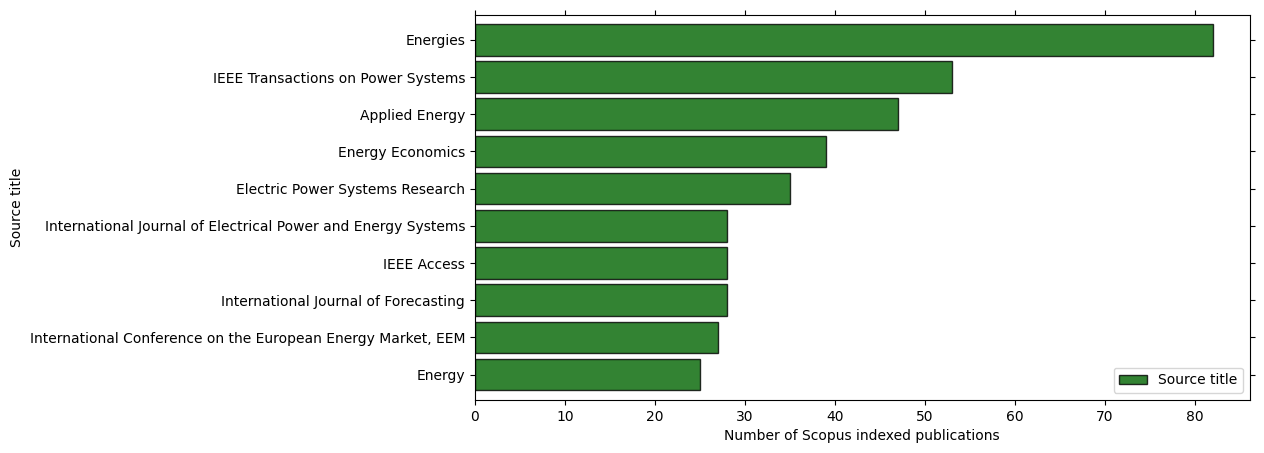

In [232]:
src_title=q1.groupby("Source title")["Source title"].count()
# top ten
src_title=src_title.sort_values(ascending=False).head(10)


src_title[::-1].plot( kind="barh", stacked=True,figsize=(10,5), width=0.85, edgecolor="black", alpha=0.8, color="darkgreen")

# ticks
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,bottom=True, top=True, left=True, right=True)

# labels
plt.xlabel("Number of Scopus indexed publications")
plt.ylabel("Source title")

plt.legend(loc="lower right")
plt.savefig("../thesis/images/src_title.jpg")